In [24]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [25]:
# loading data
csvpath = Path('../Project-03/teamGameStats.csv')
teamstats_df = pd.read_csv(csvpath)

In [26]:
# dropping unneeded columns
# subsequent analysis dropped '+/-' and 'PTS' columns
teamstats_df = teamstats_df.drop(columns=['TEAM','MATCHUP','GAMEDATE','+/-','PTS'])

In [27]:
# defining 'W/L' column as feature set
X = teamstats_df.copy()
X.drop('W/L', axis=1, inplace=True)
X.head(16)

,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF
0,48,45,92,48.9,13,32,40.6,26,34,76.5,14,37,51,20,10,8,7,19
1,48,39,83,47.0,18,43,41.9,13,17,76.5,7,39,46,26,14,6,8,25
2,53,41,101,40.6,6,27,22.2,24,30,80.0,20,32,52,25,13,6,4,16
3,48,38,87,43.7,16,39,41.0,17,21,81.0,16,37,53,28,17,9,1,13
4,48,36,91,39.6,10,36,27.8,19,28,67.9,13,34,47,18,9,7,3,17
5,48,37,82,45.1,14,33,42.4,18,21,85.7,9,37,46,22,23,6,8,19
6,48,36,88,40.9,17,45,37.8,16,21,76.2,6,31,37,27,11,6,7,21
7,48,41,91,45.1,11,32,34.4,17,19,89.5,9,27,36,28,15,10,5,19
8,48,37,96,38.5,17,38,44.7,21,24,87.5,16,31,47,23,15,9,5,15
9,48,45,92,48.9,10,32,31.3,17,20,85.0,8,33,41,33,12,7,5,27


In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13658 entries, 0 to 13657
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MIN     13658 non-null  int64  
 1   FGM     13658 non-null  int64  
 2   FGA     13658 non-null  int64  
 3   FG%     13658 non-null  float64
 4   3PM     13658 non-null  int64  
 5   3PA     13658 non-null  int64  
 6   3P%     13658 non-null  float64
 7   FTM     13658 non-null  int64  
 8   FTA     13658 non-null  int64  
 9   FT%     13658 non-null  float64
 10  OREB    13658 non-null  int64  
 11  DREB    13658 non-null  int64  
 12  REB     13658 non-null  int64  
 13  AST     13658 non-null  int64  
 14  TOV     13658 non-null  int64  
 15  STL     13658 non-null  int64  
 16  BLK     13658 non-null  int64  
 17  PF      13658 non-null  int64  
dtypes: float64(3), int64(15)
memory usage: 1.9 MB


In [31]:
# defining target vector
y=teamstats_df['W/L'].values.reshape(-1,1)
# defining target vector
#y=teamstats_df['W/L'].ravel()
y[:5]

array([['W'],
       ['W'],
       ['L'],
       ['W'],
       ['L']], dtype=object)

In [32]:
# converting 'W/L' to 0/1's
y=teamstats_df['W/L'].apply(lambda x: 1 if x=="W" else 0)
y[:5]

0    1
1    1
2    0
3    1
4    0
Name: W/L, dtype: int64

In [33]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [34]:
# Creating StandardScaler instance
#scaler = StandardScaler()

# Fitting Standard Scaller
#X_scaler = scaler.fit(X_train)

In [35]:
# Scaling data
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [50]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=40, random_state=78)

In [51]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
#rf_model = rf_model.fit(X_train_scaled, y_train)

In [52]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)
#predictions = rf_model.predict(X_test_scaled)

In [53]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [54]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1402,302
Actual 1,353,1358


Accuracy Score : 0.808199121522694
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1704
           1       0.82      0.79      0.81      1711

    accuracy                           0.81      3415
   macro avg       0.81      0.81      0.81      3415
weighted avg       0.81      0.81      0.81      3415



In [41]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_


In [42]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.15408828011752743, 'FG%'),
 (0.10476749589887967, 'DREB'),
 (0.08943242183975976, '3P%'),
 (0.08423754495304293, 'REB'),
 (0.06711101276550002, 'FGM'),
 (0.05391170933564782, 'STL'),
 (0.047955598018468486, 'TOV'),
 (0.047364806686627216, 'FT%'),
 (0.044835338930968346, 'FTM'),
 (0.04347242948910584, 'AST'),
 (0.04229332394068847, 'FGA'),
 (0.0415238766005576, 'PF'),
 (0.03915991652169089, 'FTA'),
 (0.035016528031731865, '3PA'),
 (0.034021633603817734, 'BLK'),
 (0.033106340315682256, '3PM'),
 (0.031126114004838206, 'OREB'),
 (0.0065756289454655835, 'MIN')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

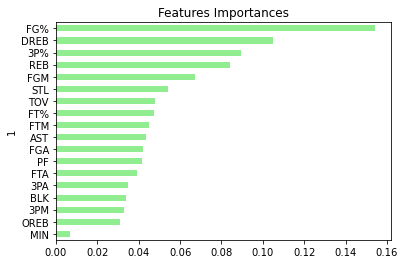

In [43]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

Accuracy Score : 0.8105417276720351
